<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/02_Production_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torch

     |████████████████████████████████| 735.5MB 24kB/s 


In [7]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [8]:
import shutil
from fastbook import *
from fastai.vision.widgets import *

Instead of searching in Bing, we will search in Duck Duck Go with the package jmd_imagescraper

https://forums.fast.ai/t/bing-account-expired-what-other-option/76856/15

In [9]:
!pip install -q jmd_imagescraper
from pathlib import Path
from jmd_imagescraper.core import *

In [19]:
pet_types = "cat", "dog"
path = Path().cwd()/"pets"

In [20]:
if path.exists():
    shutil.rmtree(path)

if not path.exists():
    path.mkdir()
    for o in pet_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = duckduckgo_search(path, o, o, max_results=100)

Duckduckgo search: cat


Duckduckgo search: dog


In [21]:
fns = get_image_files(path)
fns

(#200) [Path('/content/pets/cat/051_ab6139d3.jpg'),Path('/content/pets/cat/055_a5b56f25.jpg'),Path('/content/pets/cat/016_82ee2f05.jpg'),Path('/content/pets/cat/097_44593dea.jpg'),Path('/content/pets/cat/015_15994385.jpg'),Path('/content/pets/cat/091_876d2eed.jpg'),Path('/content/pets/cat/070_09f1c224.jpg'),Path('/content/pets/cat/090_40326ded.jpg'),Path('/content/pets/cat/088_a70f3955.jpg'),Path('/content/pets/cat/048_35200e21.jpg')...]

In [22]:
failed = verify_images(fns)
failed

(#0) []

In [30]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pets.dataloaders(path)

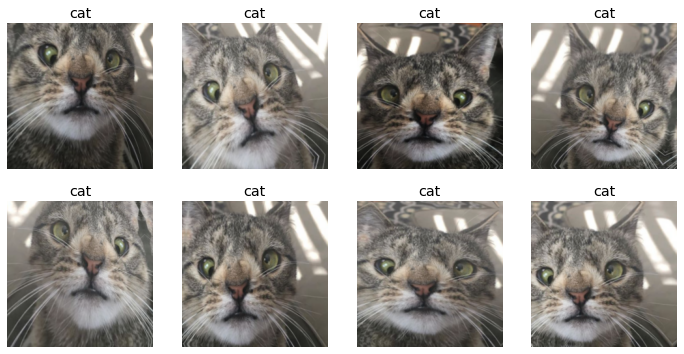

In [31]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [44]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.230665,0.686413,0.307692,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.276081,0.517019,0.256410,00:02
1,0.195721,0.409942,0.153846,00:02
2,0.150728,0.392918,0.153846,00:02
3,0.113021,0.352710,0.128205,00:02


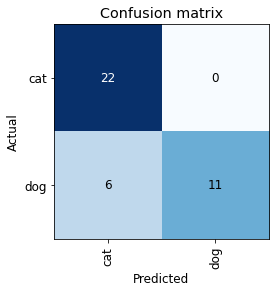

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

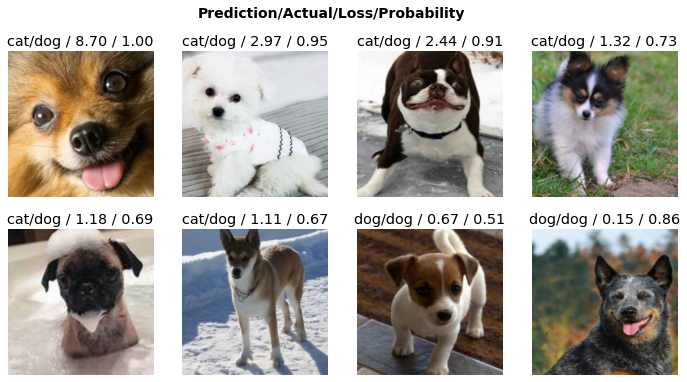

In [42]:
interp.plot_top_losses(8, nrows=2)

In [43]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [29]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()